# Fourier Ptychography Recovery

This notebook is used to analyze the results of the simulation and recovery tools provided by this library.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io

from leb.freeze import PupilRecoveryMethod, fp_recover, fp_simulation

## Simulate a dataset and ground truth object and pupil

The object is the complex object from which the simulated images are generated, i.e. it has a complex datatype (amplitude and phase).

In [2]:
# Simulate a FP dataset with a pupil aberrated with Zernike polynomials from the first six Noll indexes
zernike_coeffs = [0.1, 0.2, 0.1, 0.5, 0.3, 0.3, 0.8, 0.3, 0.6 ]
dataset, unaberrated_pupil, ground_truth_object, ground_truth_pupil = fp_simulation(
    zernike_coeffs=zernike_coeffs,
    num_leds=(20, 20),
    center_led=(16, 16),
    led_pitch_mm=(4.0, 4.0),
    axial_offset_mm=-65,
    px_size_um=5.86,
    na=0.288,
    mag=10,
)

# Recover the complex object
results = fp_recover(
    dataset=dataset,
    pupil=unaberrated_pupil,
    num_iterations=10,
    pupil_recovery_method=PupilRecoveryMethod.GD,
    show_progress=True,
)

100%|██████████| 10/10 [00:16<00:00,  1.61s/it]


### Ground truth object: amplitude and phase

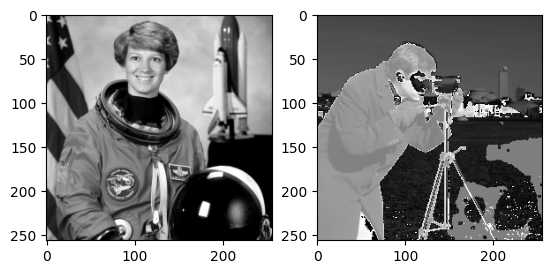

In [3]:
io.imshow_collection([np.abs(ground_truth_object), np.angle(ground_truth_object)], cmap=plt.cm.gray)
io.show()

### Ground truth pupil

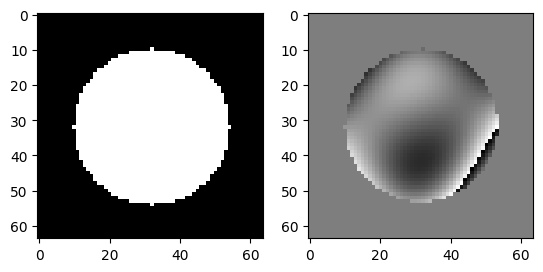

In [4]:
io.imshow_collection([np.abs(ground_truth_pupil.p), np.angle(ground_truth_pupil.p)], cmap=plt.cm.gray)
io.show()


### Simulated images

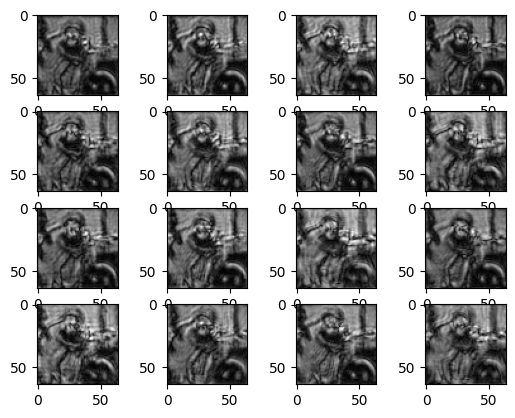

In [5]:
# Simulated images 0 - 15
io.imshow_collection(dataset.images[:16], cmap=plt.cm.gray)
io.show()

## Results

### Object

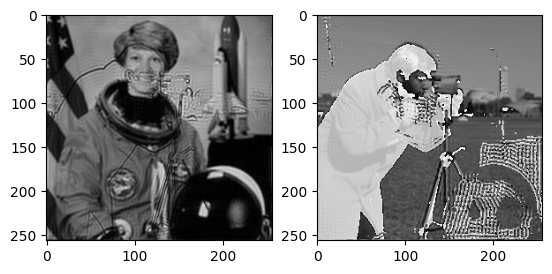

In [6]:
io.imshow_collection([np.abs(results.object), np.angle(results.object)], cmap=plt.cm.gray)
io.show()

### Pupil

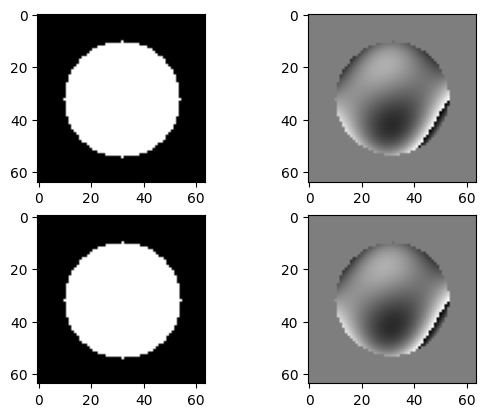

In [7]:
# Recovered / ground truth
io.imshow_collection([np.abs(results.pupil.p), np.angle(results.pupil.p), np.abs(ground_truth_pupil.p), np.angle(ground_truth_pupil.p)], cmap=plt.cm.gray)
io.show()

#### Difference

/home/kmd/src/leb/mr-freeze/.venv/lib/python3.11/site-packages/skimage/io/_plugins/matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


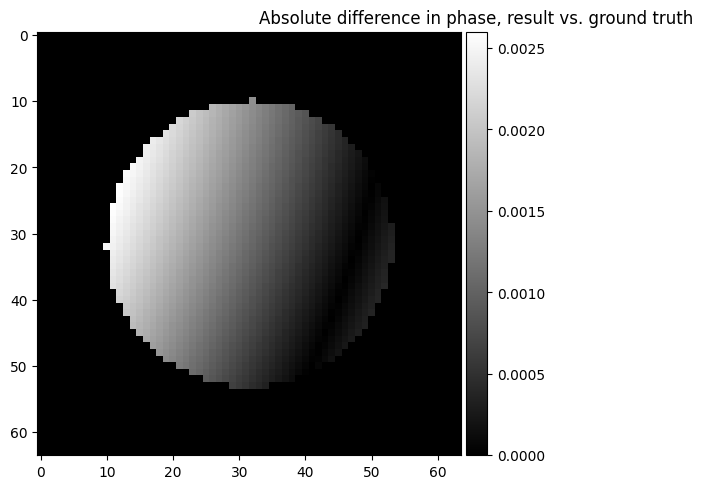

In [8]:
diff = np.abs(np.angle(results.pupil.p) - np.angle(ground_truth_pupil.p))

io.imshow(diff, cmap="gray")
plt.title("Absolute difference in phase, result vs. ground truth")
plt.show()

### Gradient descent performance

This is only relevant if `PupilRecoveryMethod` was set to `GD`.

In [9]:
# View the final Zernike coefficients of the simulated FP images
print(results.zernike_coeffs[-1])

[0.032169729980892965, 0.06343209049886032, 0.031751809171804694, 0.15915142456556367, 0.0954986898473685, 0.09549943400690641, 0.2546481980293072, 0.0954927630398091, 0.1909867922151717, 1.6535252879768316e-07]


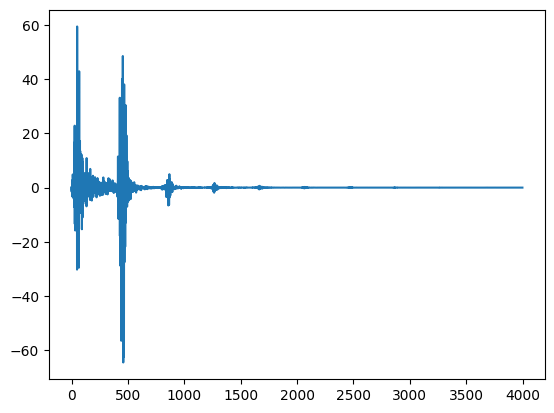

In [10]:
# View the gradient of the loss function with respect to time
plt.plot(results.gradients, label='gradient')
plt.show()